In [1]:
import pandas as pd
import numpy as np
import hts

import matplotlib.pyplot as plt
import seaborn as sns
from hts.hierarchy import HierarchyTree

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.simplefilter("ignore")

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
data1 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202008.csv")
data2 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202009.csv")
data3 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202010.csv")
data4 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202011.csv")
data5 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202012.csv")
data6 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202101.csv")
data7 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202102.csv")
data = pd.concat([data1, data2, data3,data4,data5,data6,data7], axis=0)
data = data.sort_values(by="DATE_TIME")
data

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
12325,2020-08-01 00:00:00,1,KARAYOLU,İETT,2,NORMAL,575,658
6666,2020-08-01 00:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,39,39
11765,2020-08-01 00:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,317,410
1155,2020-08-01 00:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,102,127
18501,2020-08-01 00:00:00,2,RAY,MARMARAY,2,AKTARMA,67,67
...,...,...,...,...,...,...,...,...
2066,2021-02-28 23:00:00,2,RAY,MARMARAY,2,NORMAL,128,128
17916,2021-02-28 23:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,2,2
11707,2021-02-28 23:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,AKTARMA,17,17
16428,2021-02-28 23:00:00,2,RAY,EDİRNEKAPI-SULTANÇİFTLİĞİ,2,NORMAL,272,272


In [3]:
data = data.drop(["TRANSPORT_TYPE_ID",'TRANSFER_TYPE_ID', 'TRANSFER_TYPE','NUMBER_OF_PASSAGE'],axis=1)

data.columns = [col_name.lower() for col_name in data.columns]

df = data.groupby(["date_time","transport_type_desc","line"])["number_of_passenger"].sum().reset_index(drop=False)

df["line"] = df["line"].apply(lambda x: x.replace(" ", "_").replace("'", "").replace("-","_"))

df["transport_line"] = df.apply(lambda x: f"{x['transport_type_desc']}_{x['line']}", axis=1)

df

,date_time,transport_type_desc,line,number_of_passenger,transport_line
0,2020-08-01 00:00:00,DENİZ,MOTOR_TEKNE,425,DENİZ_MOTOR_TEKNE
1,2020-08-01 00:00:00,DENİZ,ŞEHİR_HATLARI,102,DENİZ_ŞEHİR_HATLARI
2,2020-08-01 00:00:00,KARAYOLU,METROBÜS,7135,KARAYOLU_METROBÜS
3,2020-08-01 00:00:00,KARAYOLU,ÖHO,3508,KARAYOLU_ÖHO
4,2020-08-01 00:00:00,KARAYOLU,İETT,708,KARAYOLU_İETT
...,...,...,...,...,...
87836,2021-02-28 23:00:00,RAY,LEVENT___RUMELİ_HİSARÜSTÜ,2,RAY_LEVENT___RUMELİ_HİSARÜSTÜ
87837,2021-02-28 23:00:00,RAY,MARMARAY,128,RAY_MARMARAY
87838,2021-02-28 23:00:00,RAY,T5_EMİNÖNÜ_ALİBEYKÖY,32,RAY_T5_EMİNÖNÜ_ALİBEYKÖY
87839,2021-02-28 23:00:00,RAY,TAKSİM_4.LEVENT,514,RAY_TAKSİM_4.LEVENT


In [4]:
df_bottom_level = df.pivot(index="date_time", columns="transport_line", values="number_of_passenger")
df_bottom_level

transport_line,DENİZ_MOTOR_TEKNE,DENİZ_ŞEHİR_HATLARI,KARAYOLU_METROBÜS,KARAYOLU_ÖHO,KARAYOLU_İETT,RAY_AKSARAY_HAVALİMANI,RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ,RAY_KABATAŞ_BAĞCILAR,RAY_KABATAŞ_MAHMUTBEY,RAY_KADIKÖY_KARTAL_METROSU,...,RAY_LEVENT___RUMELİ_HİSARÜSTÜ,RAY_MARMARAY,RAY_T5_EMİNÖNÜ_ALİBEYKÖY,RAY_TAKSİM_4.LEVENT,RAY_TAKSİM_KABATAŞ_FUNİKULERİ,RAY_TELEFERİK_EYÜP_PİYERLOTİ,RAY_TELEFERİK_MAÇKA___TAŞKIŞLA,RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU,RAY_İETT_NOSTALJİK_TRAMVAY,RAY_İETT_TÜNEL
date_time,,,,,,,,,,,,,,,,,,,,,
2020-08-01 00:00:00,425.0,102.0,7135.0,3508.0,708.0,494.0,625.0,1297.0,NaN,98.0,...,8.0,176.0,NaN,439.0,NaN,NaN,NaN,141.0,NaN,NaN
2020-08-01 01:00:00,5.0,49.0,3056.0,163.0,226.0,4.0,2.0,NaN,NaN,NaN,...,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01 02:00:00,6.0,NaN,1488.0,8.0,144.0,2.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01 03:00:00,2.0,NaN,776.0,29.0,81.0,1.0,1.0,4.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01 04:00:00,8.0,15.0,631.0,86.0,106.0,1.0,25.0,11.0,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28 19:00:00,137.0,400.0,5348.0,17931.0,4023.0,2558.0,1390.0,2142.0,1017.0,782.0,...,NaN,1830.0,68.0,1803.0,NaN,1.0,NaN,954.0,NaN,34.0
2021-02-28 20:00:00,57.0,170.0,3896.0,10999.0,2182.0,1759.0,919.0,1401.0,682.0,456.0,...,4.0,1277.0,32.0,1261.0,NaN,NaN,NaN,581.0,NaN,15.0
2021-02-28 21:00:00,80.0,74.0,2839.0,5979.0,832.0,1363.0,732.0,1019.0,545.0,357.0,...,1.0,1005.0,33.0,992.0,NaN,NaN,NaN,470.0,NaN,NaN


In [5]:
df_bottom_level.isnull().any()

transport_line
DENİZ_MOTOR_TEKNE                  True
DENİZ_ŞEHİR_HATLARI                True
KARAYOLU_METROBÜS                 False
KARAYOLU_ÖHO                       True
KARAYOLU_İETT                      True
RAY_AKSARAY_HAVALİMANI             True
RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ      True
RAY_KABATAŞ_BAĞCILAR               True
RAY_KABATAŞ_MAHMUTBEY              True
RAY_KADIKÖY_KARTAL_METROSU         True
RAY_KADIKÖY_MODA                   True
RAY_KİRAZLI_OLİMPİYATKÖY           True
RAY_LEVENT___RUMELİ_HİSARÜSTÜ      True
RAY_MARMARAY                       True
RAY_T5_EMİNÖNÜ_ALİBEYKÖY           True
RAY_TAKSİM_4.LEVENT                True
RAY_TAKSİM_KABATAŞ_FUNİKULERİ      True
RAY_TELEFERİK_EYÜP_PİYERLOTİ       True
RAY_TELEFERİK_MAÇKA___TAŞKIŞLA     True
RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU       True
RAY_İETT_NOSTALJİK_TRAMVAY         True
RAY_İETT_TÜNEL                     True
dtype: bool

In [6]:
def transort_line(data,col = data.columns):
    for i in data.columns:
        if data[i].isnull().any() == True:
            mean = data[i].mean()
            data[i].fillna(mean,inplace=True)

transort_line(df_bottom_level,col=df_bottom_level.columns)

In [7]:
df_bottom_level.isnull().any()

transport_line
DENİZ_MOTOR_TEKNE                 False
DENİZ_ŞEHİR_HATLARI               False
KARAYOLU_METROBÜS                 False
KARAYOLU_ÖHO                      False
KARAYOLU_İETT                     False
RAY_AKSARAY_HAVALİMANI            False
RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ     False
RAY_KABATAŞ_BAĞCILAR              False
RAY_KABATAŞ_MAHMUTBEY             False
RAY_KADIKÖY_KARTAL_METROSU        False
RAY_KADIKÖY_MODA                  False
RAY_KİRAZLI_OLİMPİYATKÖY          False
RAY_LEVENT___RUMELİ_HİSARÜSTÜ     False
RAY_MARMARAY                      False
RAY_T5_EMİNÖNÜ_ALİBEYKÖY          False
RAY_TAKSİM_4.LEVENT               False
RAY_TAKSİM_KABATAŞ_FUNİKULERİ     False
RAY_TELEFERİK_EYÜP_PİYERLOTİ      False
RAY_TELEFERİK_MAÇKA___TAŞKIŞLA    False
RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU      False
RAY_İETT_NOSTALJİK_TRAMVAY        False
RAY_İETT_TÜNEL                    False
dtype: bool

In [8]:
df_middle_level = df.groupby(["date_time", "transport_type_desc"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="date_time", columns="transport_type_desc", values="number_of_passenger")
df_middle_level

transport_type_desc,DENİZ,KARAYOLU,RAY
date_time,,,
2020-08-01 00:00:00,527.0,11351.0,3321.0
2020-08-01 01:00:00,54.0,3445.0,12.0
2020-08-01 02:00:00,6.0,1640.0,4.0
2020-08-01 03:00:00,2.0,886.0,7.0
2020-08-01 04:00:00,23.0,823.0,40.0
...,...,...,...
2021-02-28 19:00:00,537.0,27302.0,13086.0
2021-02-28 20:00:00,227.0,17077.0,8747.0
2021-02-28 21:00:00,154.0,9650.0,6725.0


In [9]:
df_total = df.groupby("date_time")["number_of_passenger"] \
             .sum() \
             .to_frame() \
             .rename(columns={"number_of_passenger": "total"})
df_total

,total
date_time,
2020-08-01 00:00:00,15199
2020-08-01 01:00:00,3511
2020-08-01 02:00:00,1650
2020-08-01 03:00:00,895
2020-08-01 04:00:00,886
...,...
2021-02-28 19:00:00,40925
2021-02-28 20:00:00,26051
2021-02-28 21:00:00,16529


In [10]:
hierarchy_df = df_bottom_level.join(df_middle_level) \
                              .join(df_total)
hierarchy_df.index = pd.to_datetime(hierarchy_df.index)
hierarchy_df = hierarchy_df.resample("D") \
                           .sum()

In [11]:
hierarchy_df

,DENİZ_MOTOR_TEKNE,DENİZ_ŞEHİR_HATLARI,KARAYOLU_METROBÜS,KARAYOLU_ÖHO,KARAYOLU_İETT,RAY_AKSARAY_HAVALİMANI,RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ,RAY_KABATAŞ_BAĞCILAR,RAY_KABATAŞ_MAHMUTBEY,RAY_KADIKÖY_KARTAL_METROSU,...,RAY_TAKSİM_KABATAŞ_FUNİKULERİ,RAY_TELEFERİK_EYÜP_PİYERLOTİ,RAY_TELEFERİK_MAÇKA___TAŞKIŞLA,RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU,RAY_İETT_NOSTALJİK_TRAMVAY,RAY_İETT_TÜNEL,DENİZ,KARAYOLU,RAY,total
date_time,,,,,,,,,,,,,,,,,,,,,
2020-08-01,114730.000000,121022.705093,347293.0,1.093121e+06,359050.0,212442.00000,96474.00000,248879.936477,56157.022495,99224.341674,...,7327.571762,1559.585913,534.68472,108953.294977,608.615563,7596.984546,231694.0,1799464.0,1144467.0,3175625
2020-08-02,124371.000000,127995.705093,352167.0,1.167404e+06,379115.0,221523.00000,102729.00000,258628.936477,56157.022495,103344.341674,...,7320.457410,1554.585913,534.68472,109351.431659,650.615563,8005.984546,248308.0,1898686.0,1206807.0,3353801
2020-08-03,104148.000000,109822.705093,351203.0,1.200049e+06,410531.0,219319.00000,101548.00000,247799.872954,56157.022495,97206.506255,...,6947.571762,1554.585913,534.68472,104660.431659,666.286876,7863.186091,209912.0,1961783.0,1155117.0,3326812
2020-08-04,67906.958691,68203.705093,433898.0,1.162256e+06,530761.0,212516.00000,97352.49353,222473.936477,56157.022495,113157.506255,...,5441.686114,1250.849845,534.68472,103487.431659,565.286876,7302.186091,129794.0,2084421.0,1174086.0,3388301
2020-08-05,67879.000000,69792.705093,446781.0,1.195892e+06,549404.0,213980.00000,96398.00000,238328.872954,56157.022495,103607.000000,...,5585.686114,1401.944272,534.68472,105630.431659,504.286876,7410.186091,133613.0,2149583.0,1207367.0,3490563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,57575.917382,47800.705093,544896.0,1.179188e+06,594008.0,233995.00000,116546.00000,284880.809430,83777.000000,127341.670837,...,4896.571762,1420.472136,559.62089,120170.000000,592.286876,7023.186091,96802.0,2318092.0,1502175.0,3917069
2021-02-25,54795.000000,49581.352547,551541.0,1.182276e+06,595474.0,233381.00000,115632.00000,287544.809430,83752.000000,121478.000000,...,4946.571762,1666.019350,618.34236,121017.000000,599.286876,7532.186091,102347.0,2329291.0,1511238.0,3942876
2021-02-26,68618.958691,62216.000000,599211.0,1.259044e+06,627961.0,258269.00000,127715.00000,317609.809430,90277.000000,144540.670837,...,5739.686114,1764.019350,762.62089,141395.000000,468.259001,8330.186091,128577.0,2486216.0,1688235.0,4303028


In [12]:
transports = df["transport_type_desc"].unique()
lines = df["transport_line"].unique()

total = {'total': list(transports)}
state = {k: [v for v in lines if v.startswith(k)] for k in transports}
hierarchy = {**total, **state}

In [13]:
hierarchy

{'total': ['DENİZ', 'KARAYOLU', 'RAY'],
 'DENİZ': ['DENİZ_MOTOR_TEKNE', 'DENİZ_ŞEHİR_HATLARI'],
 'KARAYOLU': ['KARAYOLU_METROBÜS', 'KARAYOLU_ÖHO', 'KARAYOLU_İETT'],
 'RAY': ['RAY_AKSARAY_HAVALİMANI',
  'RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ',
  'RAY_KABATAŞ_BAĞCILAR',
  'RAY_KADIKÖY_KARTAL_METROSU',
  'RAY_KİRAZLI_OLİMPİYATKÖY',
  'RAY_LEVENT___RUMELİ_HİSARÜSTÜ',
  'RAY_MARMARAY',
  'RAY_TAKSİM_4.LEVENT',
  'RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU',
  'RAY_TAKSİM_KABATAŞ_FUNİKULERİ',
  'RAY_İETT_TÜNEL',
  'RAY_İETT_NOSTALJİK_TRAMVAY',
  'RAY_KADIKÖY_MODA',
  'RAY_TELEFERİK_EYÜP_PİYERLOTİ',
  'RAY_TELEFERİK_MAÇKA___TAŞKIŞLA',
  'RAY_KABATAŞ_MAHMUTBEY',
  'RAY_T5_EMİNÖNÜ_ALİBEYKÖY']}

In [14]:
from hts.hierarchy import HierarchyTree

ht = HierarchyTree.from_nodes(nodes=hierarchy, df=hierarchy_df)
ht

- total
   |- DENİZ
   |  |- DENİZ_MOTOR_TEKNE
   |  - DENİZ_ŞEHİR_HATLARI
   |- KARAYOLU
   |  |- KARAYOLU_METROBÜS
   |  |- KARAYOLU_ÖHO
   |  - KARAYOLU_İETT
   - RAY
      |- RAY_AKSARAY_HAVALİMANI
      |- RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ
      |- RAY_KABATAŞ_BAĞCILAR
      |- RAY_KADIKÖY_KARTAL_METROSU
      |- RAY_KİRAZLI_OLİMPİYATKÖY
      |- RAY_LEVENT___RUMELİ_HİSARÜSTÜ
      |- RAY_MARMARAY
      |- RAY_TAKSİM_4.LEVENT
      |- RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU
      |- RAY_TAKSİM_KABATAŞ_FUNİKULERİ
      |- RAY_İETT_TÜNEL
      |- RAY_İETT_NOSTALJİK_TRAMVAY
      |- RAY_KADIKÖY_MODA
      |- RAY_TELEFERİK_EYÜP_PİYERLOTİ
      |- RAY_TELEFERİK_MAÇKA___TAŞKIŞLA
      |- RAY_KABATAŞ_MAHMUTBEY
      - RAY_T5_EMİNÖNÜ_ALİBEYKÖY

In [15]:
def plot_results(pred_df, source_df, cols_to_plot):
    """
    Helper function used for displaying the predictions vs. actuals for the indicated columns
    """
    
    if type(cols_to_plot) == str:
        cols_to_plot = list(cols_to_plot)
        
    for col in cols_to_plot:
        fig, ax = plt.subplots()
        pred_df[col].plot(ax=ax, label="Predicted")
        source_df[col].plot(ax=ax, label="Observed")
        
        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel("Trips");

In [16]:
hierarchy_df["DENİZ"].fillna(hierarchy_df["DENİZ"].mean(),inplace=True)

In [17]:
model_bu_arima = hts.HTSRegressor(model='auto_arima', revision_method='OLS', n_jobs=0)
model_bu_arima = model_bu_arima.fit(hierarchy_df, hierarchy)
pred_bu_arima = model_bu_arima.predict(steps_ahead=4)

Fitting models: 100%|██████████| 26/26 [00:00<00:00, 288.89it/s]


The MAE for the baseline model is 913164.1014454281
The MAPE for the baseline model is 0.336229894512929


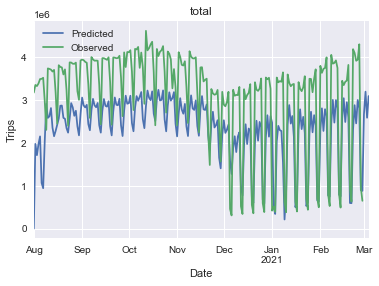

In [18]:
plot_results(pred_bu_arima, hierarchy_df, cols_to_plot=['total'])
performance_baseline_MAE = mean_absolute_error(hierarchy_df['total'], pred_bu_arima['total'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['total'], pred_bu_arima['total'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 225637.96129146693
The MAPE for the baseline model is 0.399188241121797


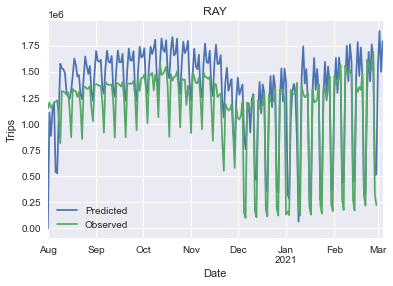

In [19]:
plot_results(pred_bu_arima, hierarchy_df, cols_to_plot=['RAY'])
performance_baseline_MAE = mean_absolute_error(hierarchy_df['RAY'], pred_bu_arima['RAY'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['RAY'], pred_bu_arima['RAY'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 123449.3831560238
The MAPE for the baseline model is 0.6384121580759122


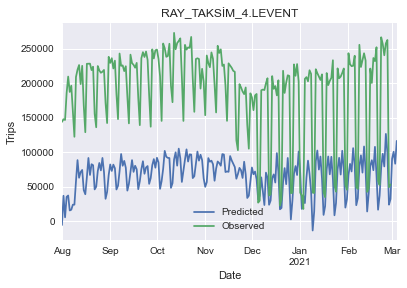

In [20]:
plot_results(pred_bu_arima, hierarchy_df, cols_to_plot=['RAY_TAKSİM_4.LEVENT'])
performance_baseline_MAE = mean_absolute_error(hierarchy_df['RAY_TAKSİM_4.LEVENT'], pred_bu_arima['RAY_TAKSİM_4.LEVENT'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['RAY_TAKSİM_4.LEVENT'], pred_bu_arima['RAY_TAKSİM_4.LEVENT'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

In [21]:
model_td_arima = hts.HTSRegressor(model='auto_arima', revision_method='AHP', n_jobs=0)

model_td_arima = model_td_arima.fit(hierarchy_df, hierarchy)
pred_td_arima = model_td_arima.predict(steps_ahead=4)

Fitting models: 100%|██████████| 26/26 [00:00<00:00, 309.40it/s]


The MAE for the baseline model is 405165.6762328577
The MAPE for the baseline model is 0.27103953222673427


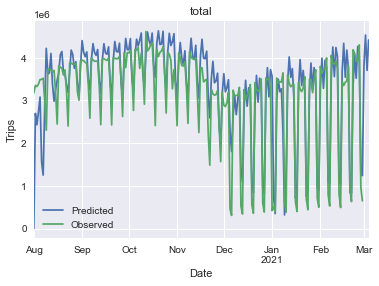

In [22]:
plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['total'])
performance_baseline_MAE = mean_absolute_error(hierarchy_df['total'], pred_td_arima['total'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['total'], pred_td_arima['total'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')


The MAE for the baseline model is 1046570.029632234
The MAPE for the baseline model is 0.8963309250249776


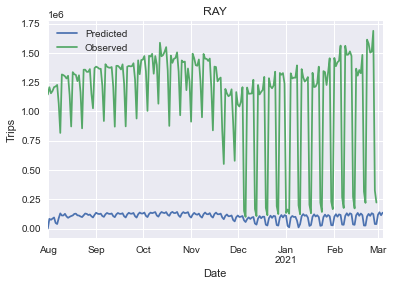

In [23]:
plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['RAY'])
performance_baseline_MAE = mean_absolute_error(hierarchy_df['RAY'], pred_td_arima['RAY'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['RAY'], pred_td_arima['RAY'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 23131.588046447072
The MAPE for the baseline model is 0.1985089192201635


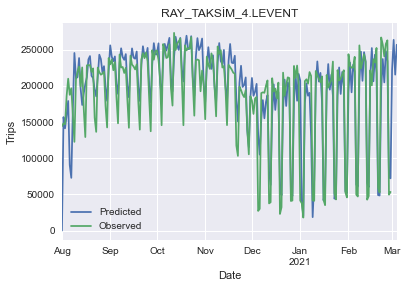

In [24]:
plot_results(pred_td_arima, hierarchy_df, cols_to_plot=['RAY_TAKSİM_4.LEVENT'])
performance_baseline_MAE = mean_absolute_error(hierarchy_df['RAY_TAKSİM_4.LEVENT'], pred_td_arima['RAY_TAKSİM_4.LEVENT'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['RAY_TAKSİM_4.LEVENT'], pred_td_arima['RAY_TAKSİM_4.LEVENT'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

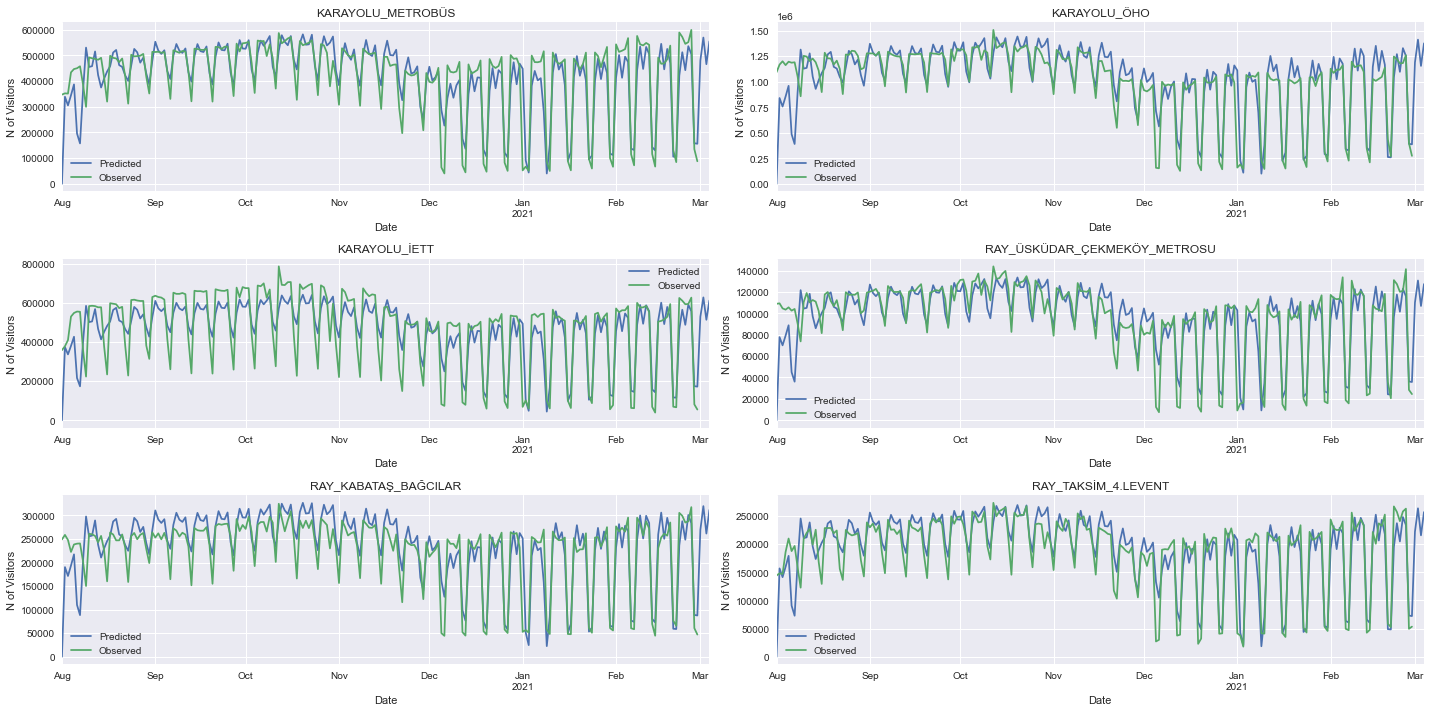

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

def plot_results(cols, axes, preds):
    axes = np.hstack(axes)
    for ax, col in zip(axes, cols):
        preds[col].plot(ax=ax, label="Predicted")
        hierarchy_df[col].plot(ax=ax, label="Observed")

        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel("N of Visitors")

states = ['KARAYOLU_METROBÜS', 'KARAYOLU_ÖHO', 'KARAYOLU_İETT','RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU','RAY_KABATAŞ_BAĞCILAR','RAY_TAKSİM_4.LEVENT']
plot_results(states, axes, pred_td_arima)
plt.tight_layout()

In [26]:
performance_baseline_MAE = mean_absolute_error(hierarchy_df['KARAYOLU_METROBÜS'], pred_td_arima['KARAYOLU_METROBÜS'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['KARAYOLU_METROBÜS'], pred_td_arima['KARAYOLU_METROBÜS'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 51655.29408545488
The MAPE for the baseline model is 0.2517123166926186


In [27]:
performance_baseline_MAE = mean_absolute_error(hierarchy_df['KARAYOLU_ÖHO'], pred_td_arima['KARAYOLU_ÖHO'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['KARAYOLU_ÖHO'], pred_td_arima['KARAYOLU_ÖHO'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 117197.10166054085
The MAPE for the baseline model is 0.20613518843257314


In [28]:
performance_baseline_MAE = mean_absolute_error(hierarchy_df['KARAYOLU_İETT'], pred_td_arima['KARAYOLU_İETT'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['KARAYOLU_İETT'], pred_td_arima['KARAYOLU_İETT'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 84849.15723315447
The MAPE for the baseline model is 0.3365414429524015


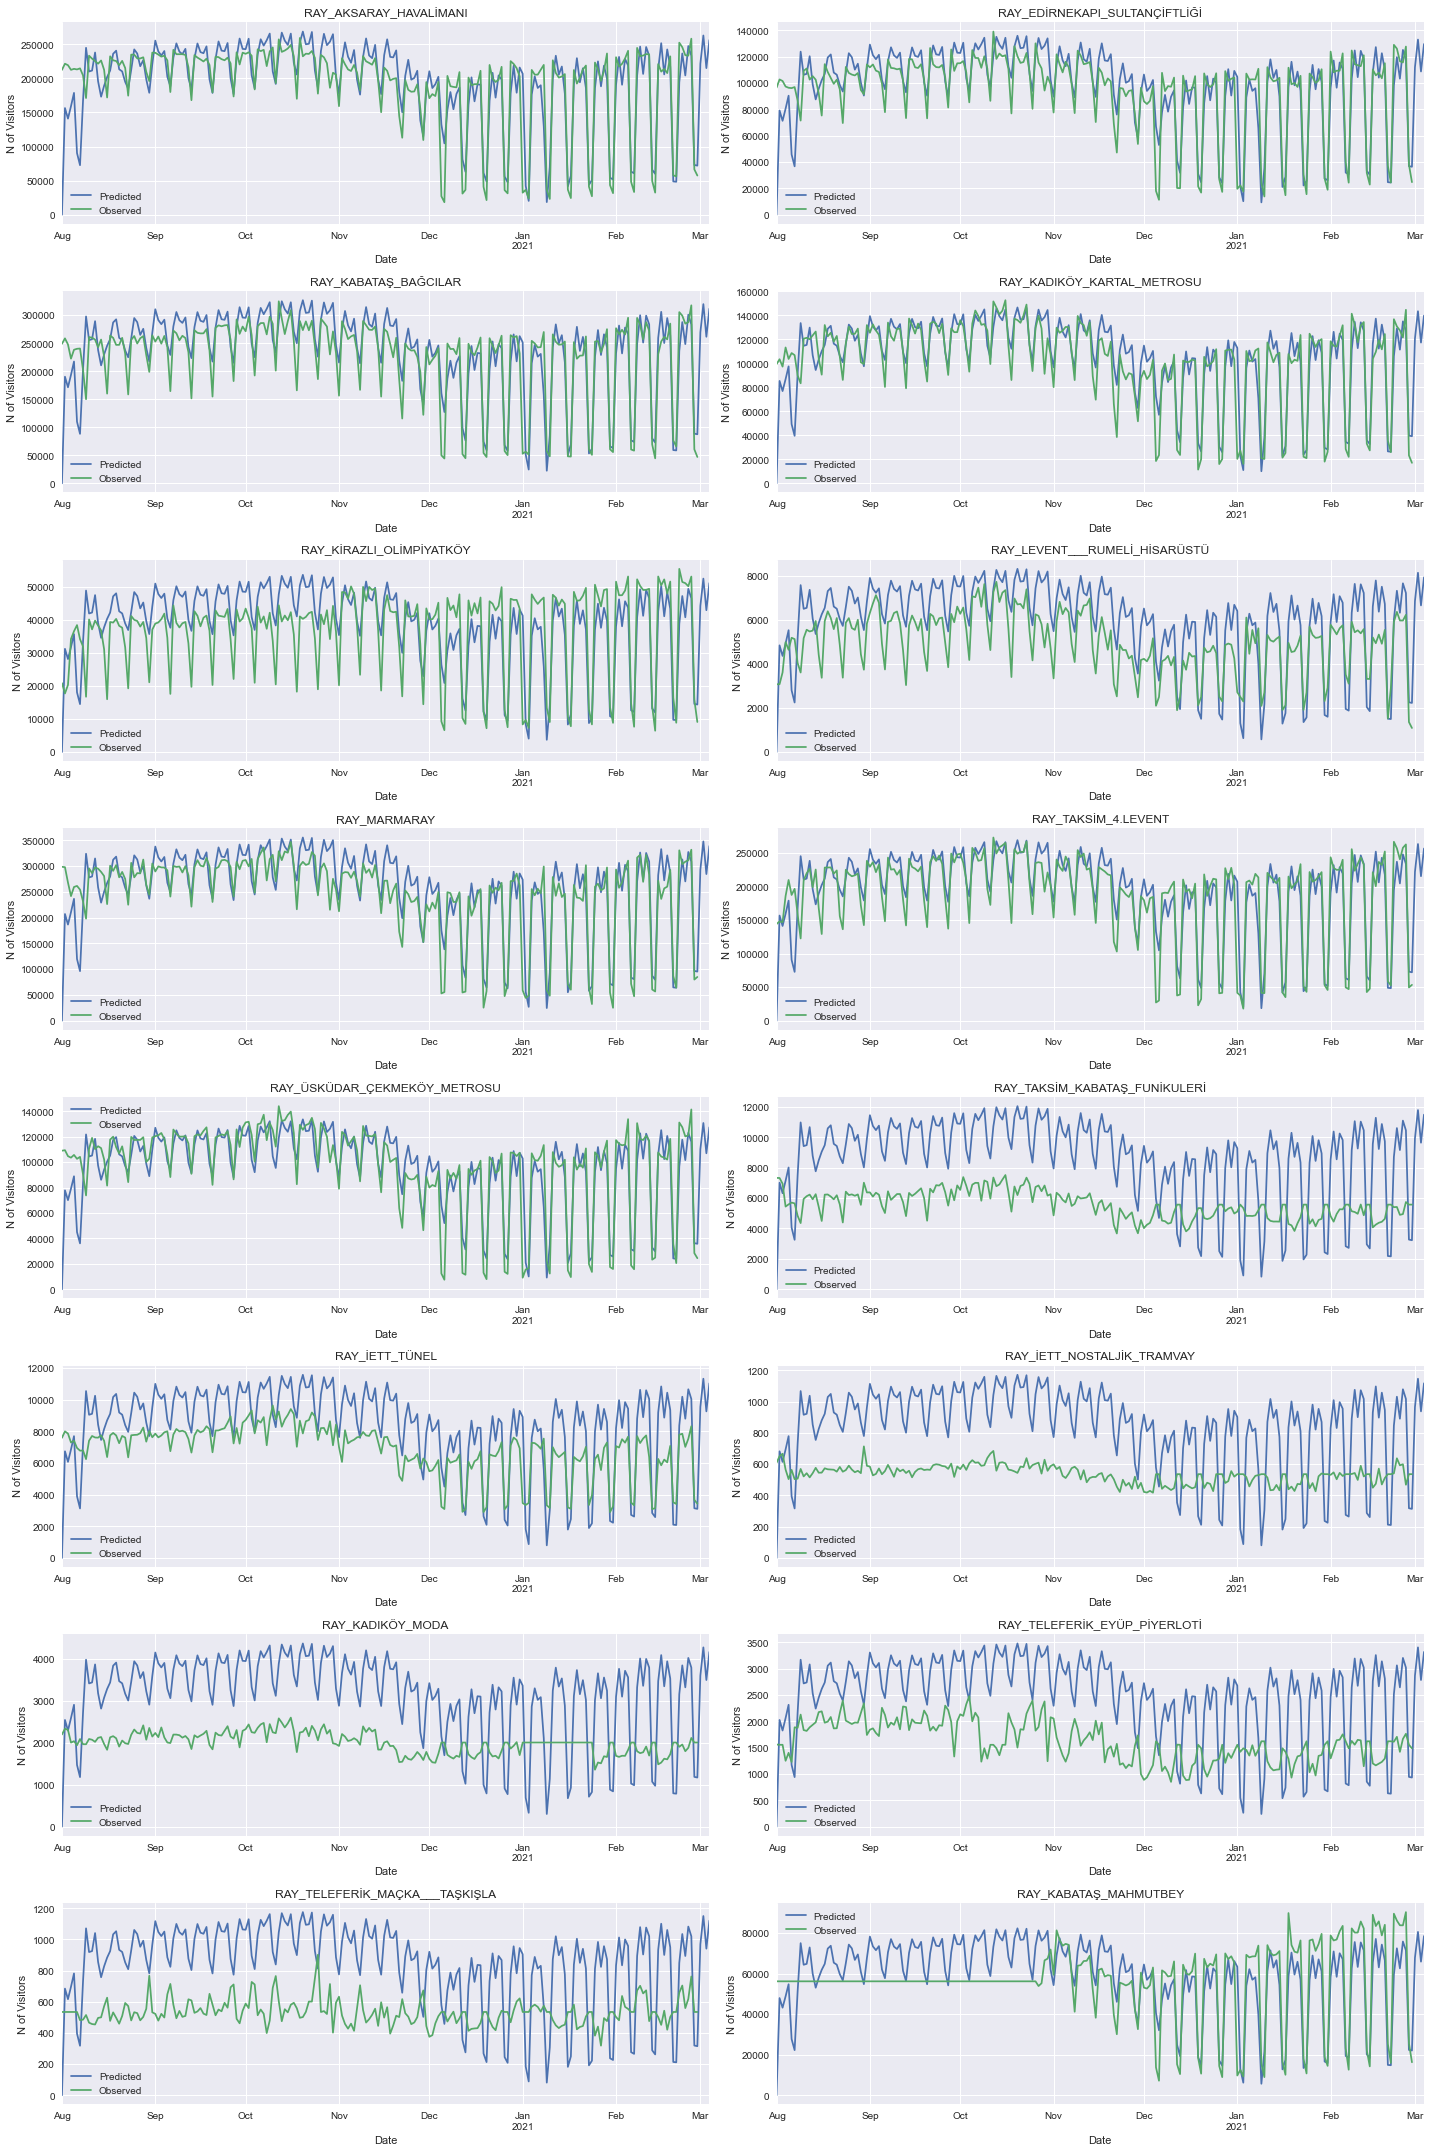

In [29]:
states = ['RAY_AKSARAY_HAVALİMANI',
  'RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ',
  'RAY_KABATAŞ_BAĞCILAR',
  'RAY_KADIKÖY_KARTAL_METROSU',
  'RAY_KİRAZLI_OLİMPİYATKÖY',
  'RAY_LEVENT___RUMELİ_HİSARÜSTÜ',
  'RAY_MARMARAY',
  'RAY_TAKSİM_4.LEVENT',
  'RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU',
  'RAY_TAKSİM_KABATAŞ_FUNİKULERİ',
  'RAY_İETT_TÜNEL',
  'RAY_İETT_NOSTALJİK_TRAMVAY',
  'RAY_KADIKÖY_MODA',
  'RAY_TELEFERİK_EYÜP_PİYERLOTİ',
  'RAY_TELEFERİK_MAÇKA___TAŞKIŞLA',
  'RAY_KABATAŞ_MAHMUTBEY',
  'RAY_T5_EMİNÖNÜ_ALİBEYKÖY']

fig, axes = plt.subplots(8, 2, figsize=(20, 30))

def plot_results(cols, axes, preds):
    axes = np.hstack(axes)
    for ax, col in zip(axes, cols):
        preds[col].plot(ax=ax, label="Predicted")
        hierarchy_df[col].plot(ax=ax, label="Observed")

        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel("N of Visitors")

#states = ['KARAYOLU_METROBÜS', 'KARAYOLU_ÖHO', 'KARAYOLU_İETT','RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU','RAY_KABATAŞ_BAĞCILAR','RAY_TAKSİM_4.LEVENT']
plot_results(states, axes, pred_td_arima)
plt.tight_layout()

In [43]:
performance_baseline_MAE = mean_absolute_error(hierarchy_df['KARAYOLU_METROBÜS'], pred_td_arima['KARAYOLU_METROBÜS'][:-4])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
# Check MAPE value
performance_baseline_MAPE = mean_absolute_percentage_error(hierarchy_df['KARAYOLU_METROBÜS'], pred_td_arima['KARAYOLU_METROBÜS'][:-4])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

lines = ['RAY_AKSARAY_HAVALİMANI',
  'RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ',
  'RAY_KABATAŞ_BAĞCILAR',
  'RAY_KADIKÖY_KARTAL_METROSU',
  'RAY_KİRAZLI_OLİMPİYATKÖY',
  'RAY_LEVENT___RUMELİ_HİSARÜSTÜ',
  'RAY_MARMARAY',
  'RAY_TAKSİM_4.LEVENT',
  'RAY_ÜSKÜDAR_ÇEKMEKÖY_METROSU',
  'RAY_TAKSİM_KABATAŞ_FUNİKULERİ',
  'RAY_İETT_TÜNEL',
  'RAY_İETT_NOSTALJİK_TRAMVAY',
  'RAY_KADIKÖY_MODA',
  'RAY_TELEFERİK_EYÜP_PİYERLOTİ',
  'RAY_TELEFERİK_MAÇKA___TAŞKIŞLA',
  'RAY_KABATAŞ_MAHMUTBEY',
  'RAY_T5_EMİNÖNÜ_ALİBEYKÖY']

def mae_mape(df,pred_df,lines):
    for line in lines:
        performance_baseline_MAE = mean_absolute_error(df[line], pred_df[line][:-4])
        print(f'{line} MAE {performance_baseline_MAE}')
        
        performance_baseline_MAPE = mean_absolute_percentage_error(df[line], pred_df[line][:-4])
        print(f'{line} The MAPE for the baseline model is {performance_baseline_MAPE}')
        
mae_mape(hierarchy_df,pred_td_arima,lines)

The MAE for the baseline model is 51655.29408545488
The MAPE for the baseline model is 0.2517123166926186
RAY_AKSARAY_HAVALİMANI MAE 23887.882875202893
RAY_AKSARAY_HAVALİMANI The MAPE for the baseline model is 0.22883446632909296
RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ MAE 12507.214810447173
RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ The MAPE for the baseline model is 0.20495414583882052
RAY_KABATAŞ_BAĞCILAR MAE 30291.86884515801
RAY_KABATAŞ_BAĞCILAR The MAPE for the baseline model is 0.19164223173869369
RAY_KADIKÖY_KARTAL_METROSU MAE 11985.210291971607
RAY_KADIKÖY_KARTAL_METROSU The MAPE for the baseline model is 0.19289787804883493
RAY_KİRAZLI_OLİMPİYATKÖY MAE 7483.624165965766
RAY_KİRAZLI_OLİMPİYATKÖY The MAPE for the baseline model is 0.2837524433410371
RAY_LEVENT___RUMELİ_HİSARÜSTÜ MAE 1316.0882094486353
RAY_LEVENT___RUMELİ_HİSARÜSTÜ The MAPE for the baseline model is 0.3038191453286669
RAY_MARMARAY MAE 31340.73506907342
RAY_MARMARAY The MAPE for the baseline model is 0.1964865698321293
RAY_TAKSİM_4.LEV

In [31]:
data1 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202008.csv")
data2 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202009.csv")
data3 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202010.csv")
data4 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202011.csv")
data5 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202012.csv")
data6 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202101.csv")
data7 = pd.read_csv(r"C:\Users\uygar\OneDrive\Desktop\mus\Bootcamp\toplu taşıma\datasets\hourly_transportation_202102.csv")
data = pd.concat([data1, data2, data3,data4,data5,data6,data7], axis=0)
data = data.sort_values(by="DATE_TIME")
data

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
12325,2020-08-01 00:00:00,1,KARAYOLU,İETT,2,NORMAL,575,658
6666,2020-08-01 00:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,39,39
11765,2020-08-01 00:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,317,410
1155,2020-08-01 00:00:00,3,DENİZ,ŞEHİR HATLARI,2,NORMAL,102,127
18501,2020-08-01 00:00:00,2,RAY,MARMARAY,2,AKTARMA,67,67
...,...,...,...,...,...,...,...,...
2066,2021-02-28 23:00:00,2,RAY,MARMARAY,2,NORMAL,128,128
17916,2021-02-28 23:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,2,2
11707,2021-02-28 23:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,AKTARMA,17,17
16428,2021-02-28 23:00:00,2,RAY,EDİRNEKAPI-SULTANÇİFTLİĞİ,2,NORMAL,272,272


In [32]:
date_time = data["DATE_TIME"]

In [33]:
date = []
time = []

for i in date_time:
    dt = i.split(" ")
    d = dt[0]
    t = dt[1]
    
    date.append(d)
    time.append(t)

In [34]:
df_dt = pd.DataFrame(zip(date,time), columns=["Date","Time"])
df_dt

,Date,Time
0,2020-08-01,00:00:00
1,2020-08-01,00:00:00
2,2020-08-01,00:00:00
3,2020-08-01,00:00:00
4,2020-08-01,00:00:00
...,...,...
155555,2021-02-28,23:00:00
155556,2021-02-28,23:00:00
155557,2021-02-28,23:00:00
155558,2021-02-28,23:00:00


In [35]:
data = pd.merge(data, df_dt, left_index=True, right_index=True)
data 

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,Date,Time
0,2020-08-31 20:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,1599,1606,2020-08-01,00:00:00
0,2020-09-15 09:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,909,910,2020-08-01,00:00:00
0,2020-10-14 14:00:00,2,RAY,İETT TÜNEL,2,NORMAL,366,404,2020-08-01,00:00:00
0,2020-11-19 17:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,2121,2138,2020-08-01,00:00:00
0,2020-12-21 17:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,NORMAL,319,354,2020-08-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...
23117,2020-11-08 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,39201,43224,2020-09-01,17:00:00
23118,2020-11-08 15:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,9131,9381,2020-09-01,17:00:00
23119,2020-11-16 08:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,925,925,2020-09-01,17:00:00
23120,2020-11-12 14:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,9644,10458,2020-09-01,17:00:00


In [36]:
data.loc[data['Time'].isin(['00:00:00'])]

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,Date,Time
0,2020-08-31 20:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,1599,1606,2020-08-01,00:00:00
0,2020-09-15 09:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,909,910,2020-08-01,00:00:00
0,2020-10-14 14:00:00,2,RAY,İETT TÜNEL,2,NORMAL,366,404,2020-08-01,00:00:00
0,2020-11-19 17:00:00,2,RAY,ÜSKÜDAR ÇEKMEKÖY METROSU,2,AKTARMA,2121,2138,2020-08-01,00:00:00
0,2020-12-21 17:00:00,2,RAY,TAKSİM-KABATAŞ FUNİKULERİ,2,NORMAL,319,354,2020-08-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...
22633,2020-11-11 17:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,3469,3588,2020-09-01,00:00:00
22634,2020-10-16 14:00:00,2,RAY,MARMARAY,2,NORMAL,13273,14090,2020-09-01,00:00:00
22634,2020-11-05 05:00:00,2,RAY,TAKSİM-4.LEVENT,2,NORMAL,238,241,2020-09-01,00:00:00
22635,2020-10-08 16:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,141,143,2020-09-01,00:00:00


In [37]:
a = np.unique(data["Time"])
a

array(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00',
       '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '20:00:00', '21:00:00', '22:00:00', '23:00:00'], dtype=object)

In [38]:
a = a[6:21]
a

array(['06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00',
       '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
       '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00'],
      dtype=object)

In [39]:
data = data.loc[data['Time'].isin(a)]
data

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,Date,Time
89,2020-08-12 11:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,4239,4342,2020-08-01,06:00:00
89,2020-09-14 21:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,272,275,2020-08-01,06:00:00
89,2020-10-17 12:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,5207,5532,2020-08-01,06:00:00
89,2020-11-10 16:00:00,2,RAY,MARMARAY,2,AKTARMA,3385,3393,2020-08-01,06:00:00
89,2020-12-28 07:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,45,45,2020-08-01,06:00:00
...,...,...,...,...,...,...,...,...,...,...
23117,2020-11-08 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,39201,43224,2020-09-01,17:00:00
23118,2020-11-08 15:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,9131,9381,2020-09-01,17:00:00
23119,2020-11-16 08:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,925,925,2020-09-01,17:00:00
23120,2020-11-12 14:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,9644,10458,2020-09-01,17:00:00


In [40]:
data = data.drop(["Date","Time"],axis=1)
data

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
89,2020-08-12 11:00:00,2,RAY,KABATAŞ-BAĞCILAR,2,AKTARMA,4239,4342
89,2020-09-14 21:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,272,275
89,2020-10-17 12:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,NORMAL,5207,5532
89,2020-11-10 16:00:00,2,RAY,MARMARAY,2,AKTARMA,3385,3393
89,2020-12-28 07:00:00,2,RAY,LEVENT - RUMELİ HİSARÜSTÜ,2,AKTARMA,45,45
...,...,...,...,...,...,...,...,...
23117,2020-11-08 08:00:00,1,KARAYOLU,ÖHO,2,NORMAL,39201,43224
23118,2020-11-08 15:00:00,1,KARAYOLU,ÖHO,2,AKTARMA,9131,9381
23119,2020-11-16 08:00:00,3,DENİZ,MOTOR TEKNE,2,AKTARMA,925,925
23120,2020-11-12 14:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,9644,10458


In [41]:
data = data.sort_values(by="DATE_TIME")
data

,DATE_TIME,TRANSPORT_TYPE_ID,TRANSPORT_TYPE_DESC,LINE,TRANSFER_TYPE_ID,TRANSFER_TYPE,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
11811,2020-08-01 00:00:00,3,DENİZ,MOTOR TEKNE,2,NORMAL,336,427
18362,2020-08-01 00:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,14,14
4320,2020-08-01 00:00:00,2,RAY,KADIKÖY-KARTAL METROSU,2,AKTARMA,29,29
274,2020-08-01 00:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,378,459
18437,2020-08-01 00:00:00,2,RAY,MARMARAY,2,NORMAL,109,126
...,...,...,...,...,...,...,...,...
3281,2021-02-28 23:00:00,2,RAY,AKSARAY-HAVALİMANI,2,AKTARMA,111,111
17916,2021-02-28 23:00:00,3,DENİZ,ŞEHİR HATLARI,2,AKTARMA,2,2
9890,2021-02-28 23:00:00,2,RAY,AKSARAY-HAVALİMANI,2,NORMAL,581,582
3337,2021-02-28 23:00:00,2,RAY,KİRAZLI-OLİMPİYATKÖY,2,AKTARMA,12,12


In [42]:
data = data.drop(["TRANSPORT_TYPE_ID",'TRANSFER_TYPE_ID', 'TRANSFER_TYPE','NUMBER_OF_PASSAGE'],axis=1)

data.columns = [col_name.lower() for col_name in data.columns]

df = data.groupby(["date_time","transport_type_desc","line"])["number_of_passenger"].sum().reset_index(drop=False)

df["line"] = df["line"].apply(lambda x: x.replace(" ", "_").replace("'", "").replace("-","_"))

df["transport_line"] = df.apply(lambda x: f"{x['transport_type_desc']}_{x['line']}", axis=1)

df

,date_time,transport_type_desc,line,number_of_passenger,transport_line
0,2020-08-01 00:00:00,DENİZ,MOTOR_TEKNE,425,DENİZ_MOTOR_TEKNE
1,2020-08-01 00:00:00,DENİZ,ŞEHİR_HATLARI,102,DENİZ_ŞEHİR_HATLARI
2,2020-08-01 00:00:00,KARAYOLU,İETT,133,KARAYOLU_İETT
3,2020-08-01 00:00:00,RAY,AKSARAY_HAVALİMANI,494,RAY_AKSARAY_HAVALİMANI
4,2020-08-01 00:00:00,RAY,EDİRNEKAPI_SULTANÇİFTLİĞİ,625,RAY_EDİRNEKAPI_SULTANÇİFTLİĞİ
...,...,...,...,...,...
77995,2021-02-28 23:00:00,RAY,KİRAZLI_OLİMPİYATKÖY,12,RAY_KİRAZLI_OLİMPİYATKÖY
77996,2021-02-28 23:00:00,RAY,LEVENT___RUMELİ_HİSARÜSTÜ,2,RAY_LEVENT___RUMELİ_HİSARÜSTÜ
77997,2021-02-28 23:00:00,RAY,T5_EMİNÖNÜ_ALİBEYKÖY,32,RAY_T5_EMİNÖNÜ_ALİBEYKÖY
77998,2021-02-28 23:00:00,RAY,TAKSİM_4.LEVENT,461,RAY_TAKSİM_4.LEVENT
